## Some overall remarks regarding homework 3




## 1- Lost in the Delta Quadrant (17 marks)

In [1]:
#import what we're going to 
#  need for the homework

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const

In [2]:
# 1.1 
# convert warp factor to speed in m/z
def warp_to_velocity(WF):
    '''
    Returns speed in m/s for given warp factor
    
    Warp factor must be between [0,10)
    '''
    # raise value error if incorrect argument passed
    if WF < 0 or WF >= 10: 
        raise ValueError('Warp factor must be [0,10)') 

    # return velocity    
    return np.array(const.speed_of_light * pow(WF, 10. / 3.))

In [3]:
# 1.1 
# convert light years to distance
def ly_to_dist(ly):
    '''
    Returns distance in m for a given distance
    light years.
    
    Light years must be positve.
    '''
    # raise value error if incorrect argument passed
    if ly < 0: 
        raise ValueError('Light Years must be positve') 

    # return velocity    
    return np.array(ly*const.light_year)

In [4]:
# 1.2
# Plot Warp Factor vs Velocity

wf = np.linspace(1,9, 100) # array for warpfactors
v  = np.zeros(wf.size) # array for velocities

#calculate velocities for each warp
for i in range(0,v.size):
    v[i] = warp_to_velocity(wf[i])

print(wf.dtype,wf.size)
print(v.dtype,v.size)

float64 100
float64 100


Text(0,0.5,'Warp Factor')

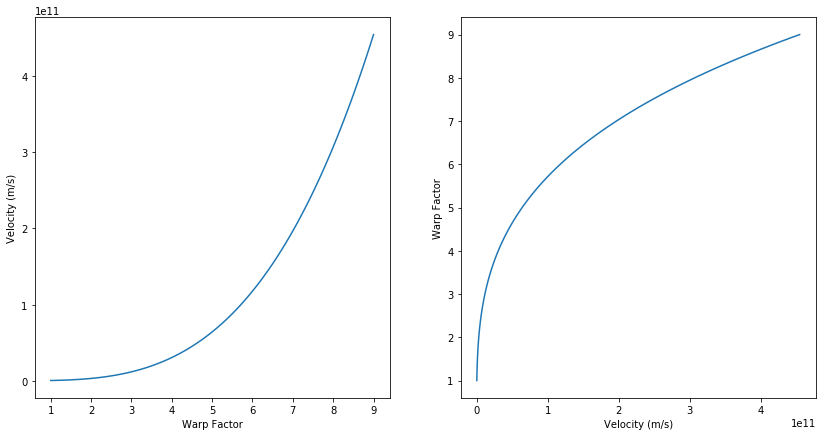

In [5]:
# create 2 plots
# first wf vs velocity
fig, axis = plt.subplots(1,2,figsize=(14,7))
axis[0].plot(wf, v)
axis[0].set_xlabel("Warp Factor")
axis[0].set_ylabel("Velocity (m/s)")
# second velocity vs wf
axis[1].plot(v, wf)
axis[1].set_xlabel("Velocity (m/s)")
axis[1].set_ylabel("Warp Factor")


In [6]:
# 1.3 How long does it take Voyager to get home?
d_ly = 7E4 # distance traveled in light years
d_m  = ly_to_dist(d_ly) # convert light years to m
wf   = [6.5,9.975] # speed in warp

for warp in wf:
    v =  warp_to_velocity(warp) #calc velocity
    time_to_travel = d_m / v # in seconds
    time_to_travel = time_to_travel/ (60. * 60. * 24. * 365.25) # convert to years
    print("Time to travel 70,000 light years at Warp {0:.3f}: {1:.3f} years".format(warp, time_to_travel))

Time to travel 70,000 light years at Warp 6.500: 136.580 years
Time to travel 70,000 light years at Warp 9.975: 32.763 years


Time to travel 70,000 light years at Warp 6.500: 136.580 years
Time to travel 70,000 light years at Warp 9.975: 32.763 years


Text(0.5,1,'Time for Voyager to get Home')

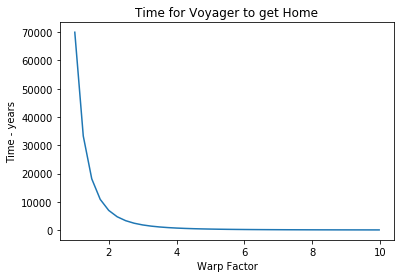

In [7]:
# 1.4 Plot of Warp Factor vs Time to get home 

# Combine questions 3 and 4 here

d_ly = 7E4 # distance traveled in light years
d_m  = ly_to_dist(d_ly) # convert light years to m

# create an array of warp factors
wf = np.arange(1,10.,0.25)
# append maximum warp to the end
wf = np.append(wf,[9.975])
# create an array to hold time
t = np.zeros(wf.size)
#counter
i = 0
for warp in wf:
    v =  warp_to_velocity(warp) #calc velocity
    time_to_travel = d_m / v # in seconds
    time_to_travel = time_to_travel/ (60. * 60. * 24. * 365.25) # convert to years
    t[i] = time_to_travel
    i = i+1 # increase counter
    if warp == 6.5 or warp == 9.975:
        print("Time to travel 70,000 light years at Warp {0:.3f}: {1:.3f} years".format(warp, time_to_travel))

# plot warp factor and time
plt.plot(wf,t)
plt.ylabel('Time - years')
plt.xlabel('Warp Factor')
plt.title('Time for Voyager to get Home')

In [8]:
# 1.5
d2neptune = 4498252900 * 1000. # neptune distance in m's

travel_d = 2*d2neptune # total travel distance is twice
travel_t = 6*60. # travel time in seconds
travel_v = travel_d/travel_t
travel_wf = pow(travel_v/const.speed_of_light, 3./10.)

print("Travel speed of the NX01: {0:.4g} m/s, Warp {1:.2f}".format(travel_v, travel_wf))

Travel speed of the NX01: 2.499e+10 m/s, Warp 3.77


## 2- Stellar Luminosity and Fluxes **(18 marks)** 

In [9]:
# 2.1 Note we don't need to raise value errors
def calc_L(R, T):
    ''' 
    Calculate stellar luminousity for give radius in meters
    and temperature in Kelvin
    '''
    return 4*const.pi * const.sigma * pow(R, 2.) * pow(T, 4.)



In [10]:
# 2.2 Note we don't need to raise value errors
def calc_F(L, r):
    ''' 
    Calculate stellar flux given an input luminousity in joules/second
    and distance in meters
    '''
    return L / (4. * const.pi * pow(r, 2.))

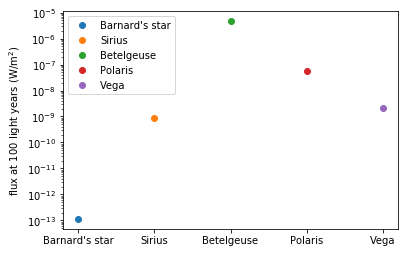

In [11]:
# 2.3 Plot stellar fluxes at 100 ly for 5 stars.
#  This is effieciently done using arrays to
# store values for all the stars and then looping
# through the arrays

# star names for legend
star_names = ["Barnard's star","Sirius","Betelgeuse","Polaris","Vega"]

# star radii * radius of the sun in m
star_radii = np.array([0.196,1.711,955,37.5,2.818]) *695.7e6 

# star temps
star_temp = np.array([3134.,9940.,3590.,6015.,9602.,])

# distance in meters
d2s = ly_to_dist(100)

s_lumi = calc_L(star_radii,star_temp)
s_flux = calc_F(s_lumi,d2s)

# Wasn't stated what the x-axis 
#  radius, temperature, or luminousity
#  would have been fine
# Am going to plot on the x-axis the name
#  of each star

# looping through will produce
#  different colors and allow a legend
for i in range(s_flux.size):
    plt.plot(i,s_flux[i], "o", label=star_names[i])

# change the ticks to the star names
plt.xticks(range(len(s_flux)), star_names)
plt.yscale('log') # this wasn't required but the range of the data suggest a log axis
plt.ylabel("flux at 100 light years (W/m$^2$)")
plt.legend()
plt.show()

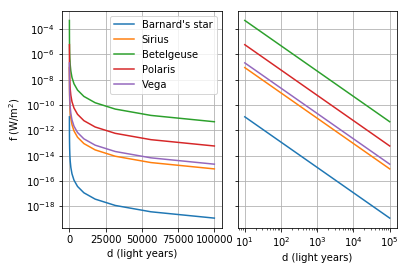

In [12]:
# 2.4 

# stellar distances
# create distance stepping by 0.25
# raise to power of 10 to step logarithmically

# distnace in light years
s_d  = np.arange(1,5.25,0.25)
s_d  = 10**s_d
# distance in meters
s_dm = s_d*const.light_year

fig, axes = plt.subplots(1,2, sharey=True)
# Small vertical space between axes
fig.subplots_adjust(wspace=0.1)

for i in range(star_radii.size):
    # calculate flux
    s_flux = calc_F(calc_L(star_radii[i], star_temp[i]), s_dm)
    
    axes[0].plot(s_d,s_flux,label=star_names[i])
    axes[1].plot(s_d,s_flux,label=star_names[i])

# set log scale on x-axis 2nd plot    
axes[1].set_xscale('log')
# set log scale on y-axis 2nd plot
#b/c the y-axis are shared this will
#change first plot as well
axes[1].set_yscale('log')    

#set labels
axes[0].set_xlabel('d (light years)')
axes[1].set_xlabel('d (light years)')
axes[0].set_ylabel('f (W/m$^2$)')

#add a grid
axes[0].grid()
axes[1].grid()

axes[0].legend()

## 2- Slicing with NumPy (10 marks)

There where many ways to do these questions. Functions could be written to loop through indicies or the Python slicing could be used. I'll use Python slicing.

In [13]:
import numpy as np
a = np.linspace(-12,12, 16)
print(a)

[-12.  -10.4  -8.8  -7.2  -5.6  -4.   -2.4  -0.8   0.8   2.4   4.    5.6
   7.2   8.8  10.4  12. ]


In [14]:
#3 A
print(a[1::2])

[-10.4  -7.2  -4.   -0.8   2.4   5.6   8.8  12. ]


In [15]:
a = np.linspace(-12,12, 21)
#3 B
print(a[2::5])

[-9.6 -3.6  2.4  8.4]


In [16]:
a = np.linspace(-12,12, 21)
# 3 C
print(a[4:-3])
# or due to ambiguity
print(a[4:-2])

[-7.2 -6.  -4.8 -3.6 -2.4 -1.2  0.   1.2  2.4  3.6  4.8  6.   7.2  8.4]
[-7.2 -6.  -4.8 -3.6 -2.4 -1.2  0.   1.2  2.4  3.6  4.8  6.   7.2  8.4
  9.6]


In [17]:
a = np.array(range(16))
a = a.reshape((4,4))
# 3 D
print(a[1:4:, 1:4:])

[[ 5  6  7]
 [ 9 10 11]
 [13 14 15]]


In [18]:
# 3 E
print(a[1:3:, 1:3:])

[[ 5  6]
 [ 9 10]]


In [19]:
# 3 F 
a = np.array(range(3*4*4)).reshape(3,4,4)
print("a=", a)

a= [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]
  [24 25 26 27]
  [28 29 30 31]]

 [[32 33 34 35]
  [36 37 38 39]
  [40 41 42 43]
  [44 45 46 47]]]
